In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
with zipfile.ZipFile("archive.zip", 'r') as z:
    csv_file = z.namelist()[0]
    df = pd.read_csv(z.open(csv_file), encoding='latin-1')


print("Data Shape", df.shape)
print(df.head)

Data Shape (9994, 21)
<bound method NDFrame.head of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0 

In [3]:
print(df.info())
print(df.describe())
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
print("Missing Values:\n", df.isnull().sum())
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Month'] = df['Order Date'].dt.month_name()
df['Order Year'] = df['Order Date'].dt.year
df.drop(['Row ID', 'Postal Code'], axis=1, inplace=True)

Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [5]:
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Top Categories by Sales:\n", top_categories)
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print("\nProfit by Region:\n", profit_by_region)

Top Categories by Sales:
 Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

Profit by Region:
 Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64


/tmp/ipython-input-6-3698568558.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


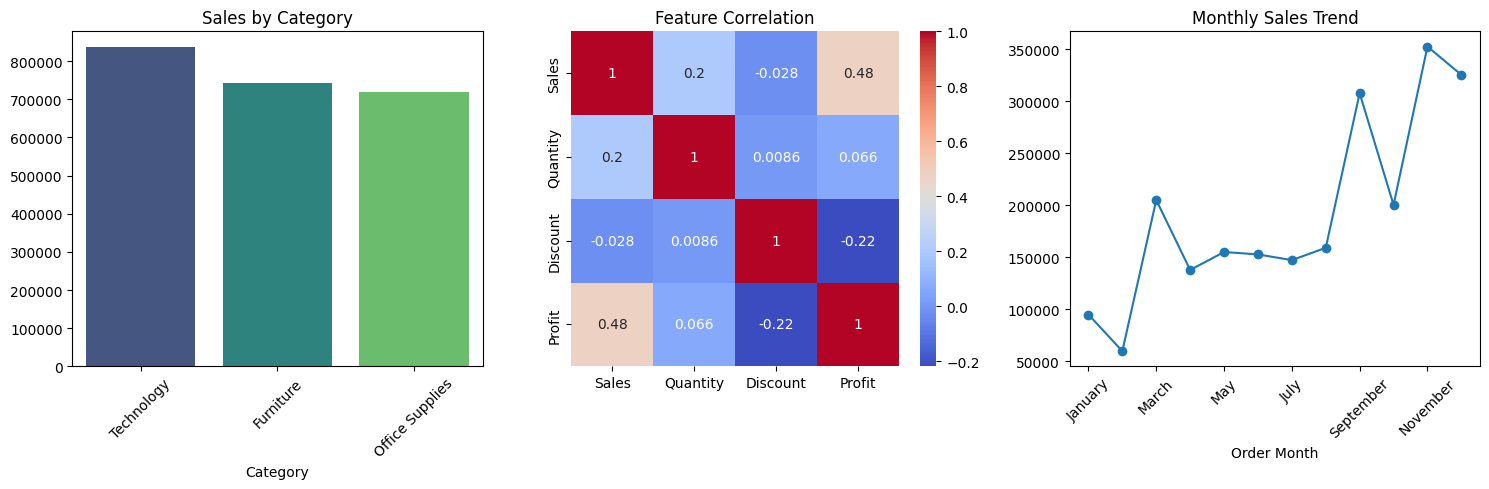

In [6]:
plt.figure(figsize=(15, 5))
# Bar chart: Sales by Category
plt.subplot(1, 3, 1)
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Sales by Category')
plt.xticks(rotation=45)
# Heatmap: Sales Correlation
plt.subplot(1, 3, 2)
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
# Line chart: Monthly Sales Trend
monthly_sales = df.groupby('Order Month')['Sales'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.subplot(1, 3, 3)
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [7]:
print("\nKey Insights:")
print("1. Top Category:",
      top_categories.idxmax(), f"(${top_categories.max():,.2f} sales)")
print("2. Most Profitable Region:",
      profit_by_region.idxmax(), f"(${profit_by_region.max():,.2f} profit)")
print("3. Discounts negatively impact Profit see heatmap correlation.")


Key Insights:
1. Top Category: Technology ($836,154.03 sales)
2. Most Profitable Region: West ($108,418.45 profit)
3. Discounts negatively impact Profit see heatmap correlation.
